# **Audio Processing For Machine Learning**

## **Working with Audio in Python**
**credit** : https://www.kaggle.com/code/youknowjp/audio-processing-for-machine-learning/notebook?select=Actor_01

In this project, we will provide a concise yet comprehensive tutorial on processing audio files and preparing them for machine learning applications. Audio data is rich and complex source of infromation, widely used in domains like speech recognition, music classification, and sentimental analysis. This tutorial will guide you through the essential steps to analyze and extract features from audio files, enabling their use in machine learning models.

1. **Understanding Audio as Data:** <br>
    * How audio is represented in the digital format(sample rate, amplitude, frequency)
    * How fundamentals of waveform visualisation and spectrograms.
2. **Preprocessing Audio:** <br>
    * Techniques for loading audio data using libraries like <librosa>
    * Methods to trim, normalize, and resample audio files for consistency.
3. **Feature Extraction:** <br>
    * Extracting meaningful features such as Mel Frequency Cepstral Coefficients (MFCCs), chroma features, and spectral contrast.
    * Converting raw audio into numerical representations suitable for machine learning algorithms.
4. **Building Machine Learning Models:** <br>
    * Using extracted features to train machine learning models to recognize patterns in audio.
    * Implementing classifiers for tasks like speech emotion recognition or genre classification. 

### **Why Process Audio Data for Machine Learning**
Audio data contains both temporal and frequency information, making it unique and challenging to work with. By transforming audio into numerical formats, such as spectrograms or MFCCs, we can leverage machine learning models to analyze, classify, and make predictions from audio inputs.

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# File Handling
from glob import glob

# Audio Processing
import librosa
import librosa.display

# Interactive Audio Playback
import IPython.display as ipd

# Utility Functions
from itertools import cycle

# Set Plotting Theme
sns.set_theme(style="white", palette=None)

# Define Color Palette and Cycle for Visualizations
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)

### **Key Concepts in Digital Audio**
To work effectively with audio in its digital form, it's important to understand several key concepts. These fundamental terms define how audio is represented, measured, and processed in digital systems. <br>

1. **Frequency (Hz)**

    * **Definition**: Frequency represents the number of complete wave cycles that occur in one second. It determines the pitch of a sound. The unit of frequency is **Hertz(Hz)**.
    * **Key Insights**:
        * High-frequency sounds have shorter wavelengths and are perceived as high-pitched (e.g., a whistle or a violin).
        * Low-frequency sounds have longer wavelengths and are perceived as low-pitched (e.g., a drum or bass guitar).
    * **Real-Life Examples**:
        * The typical human hearing range is 20Hz to 20,000 Hz.
        * Speech frequencies generally range between 250Hz and 8,000 Hz.</n>

2. **Intensity (dB/Power)**:

    * **Definition**: Intensity measures the strength or power of a sound wave, represented by its amplitude. In audio processing, intensity is often expressed in decibles(dB)
    * **Key Insights**:
        * Larger amplitudes indicate louder sounds, while smaller ampllutudes correspond to quieter sounds.
        * Intensity is a logarithmic measure, meaning a small increase in decibles represents a significant change in perceived loudness.
    * **Real-Life Examples**:
        * A whisper is around 30 dB, normal conversation is about 60 dB, and a rock concert can reach 110 dB or more.
        * Prolonged exposure to sounds above 85 dB can cause hearing damage.

3. **Sample Rate**:

    * **Definition**: The sample rate specifies how frequently a digital system captures samples of an audio signal per second. It is measured in Herts (Hz) or samples per second.
    * **Key Insights**:
        * Higher sample rates capture more detail in the audio but result in larger file sizes.
        * A sample rate must be at least twice the highest frequency in the audio to avoid aliasing, as dedicated by the Nyquist Theorem.
    * **Common Sample Rates**:
        * 44.1 kHz: Uses in CDs and many digital audio formats.
        * 48 kHz: Standard for professional audio and video production.
        * 96 kHz and 192 kHz: Used for high-resolution audio applications.

In [4]:
# Load in Dataset using glob
audio_file = glob("data/ravdess-emotional-speech-audio/*/*.wav")

In [5]:
# Play audio file
ipd.Audio(audio_file[5])

In [7]:
# Load the audio file
# `y` will contain the raw audio time-series data
# `sr` will be the sample rate of the audio
y, sr = librosa.load(audio_file[0])

# Display the first 4 samples of the raw audio data
print(f"First 4 samples of y: {y[:4]}")

# Display the shape of the audio data array
print(f"Shape of y (audio data): {y.shape}")

print(f"Sample rate: {sr} Hz")

First 4 samples of y: [ 1.8050027e-13  1.2898061e-13 -8.3495773e-15 -9.0029556e-15]
Shape of y (audio data): (83874,)
Sample rate: 22050 Hz


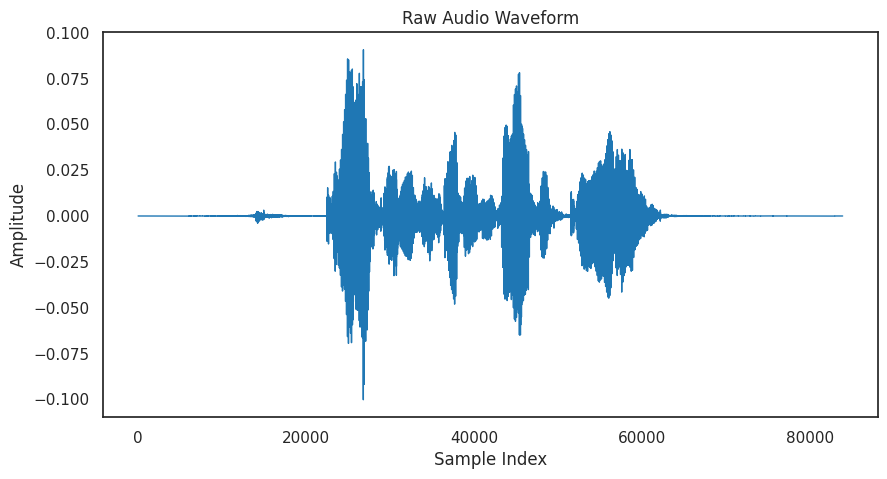

In [9]:
# Plot the raw audio waveform
pd.Series(y).plot(
    figsize=(10, 5),            # Set the figure size for better visibility
    lw=1,                       # Line width for the waveform
    title="Raw Audio Waveform", # Title of the plot
    color=color_pal[0],         # Set the color using the predifined palette
    xlabel="Sample Index",      # Label for the x-axis
    ylabel="Amplitude"          # Label for the y-axis
)

# Display the plot
plt.show()

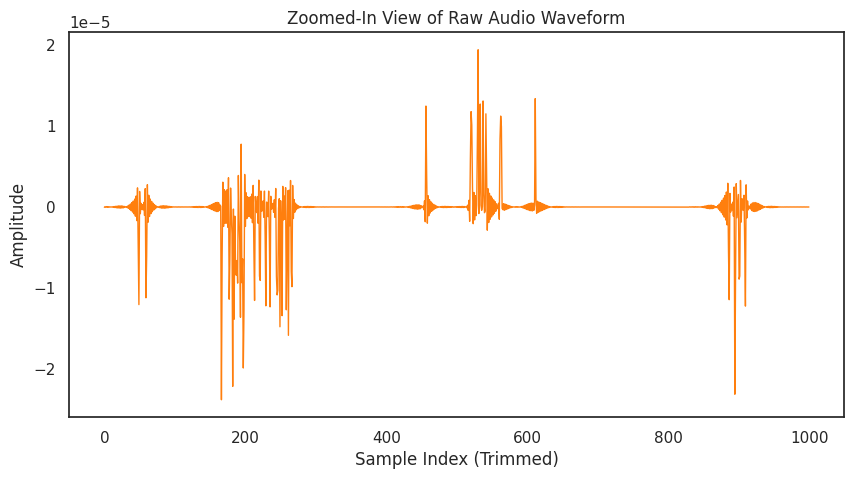

In [14]:
# Plot a trimmed section of the raw audio waveform 
pd.Series(y[1000:2000]).plot(
    figsize=(10, 5),
    lw=1,
    title="Zoomed-In View of Raw Audio Waveform",
    color=color_pal[1],
    xlabel="Sample Index (Trimmed)",
    ylabel="Amplitude"
)
plt.show()

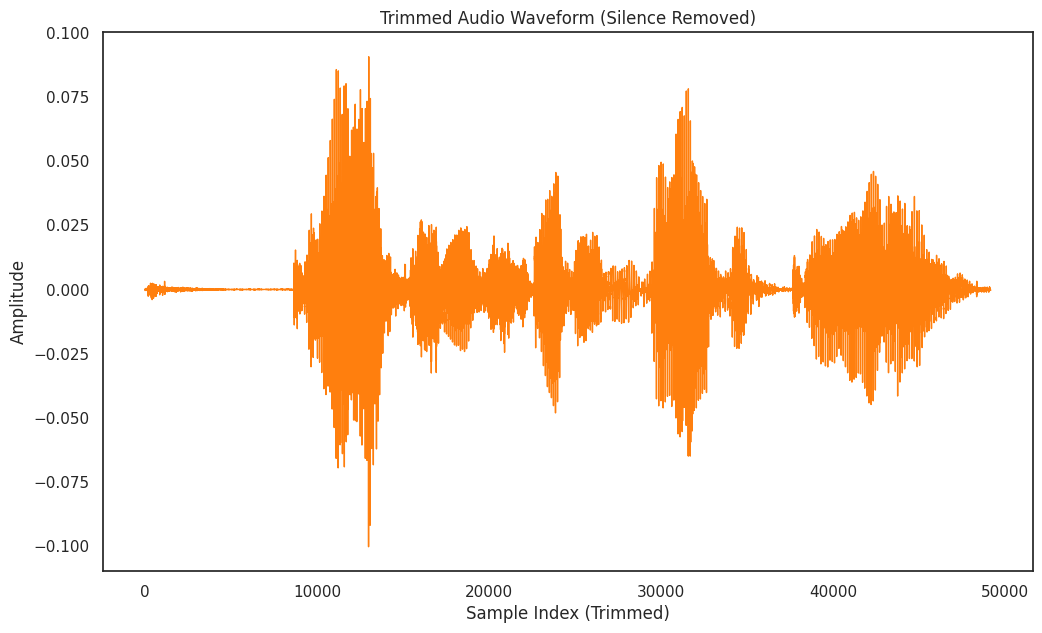

In [15]:
# Trim the audio signal to remove silence
# `y_trim` : Audio data after silence trimming
# `top_db` : Threshold in decibles for considering a region as silence
y_trim, _ = librosa.effects.trim(y, top_db=35)

pd.Series(y_trim).plot(
    figsize=(12, 7),
    lw=1, 
    title="Trimmed Audio Waveform (Silence Removed)",
    color=color_pal[1],
    xlabel="Sample Index (Trimmed)",
    ylabel="Amplitude"
)
plt.show()

### **What is a Specifically**
A **spectrogram** is a visual representation of the spectrum of frequencies in a signal as it varies over time. It is widely used in audio analysis and signal processing to understand the frequency content of an audio signal. Spectrograms are especially useful in applications like speech recognition, music analysis, and machine learning tasks involving audio.

#### **How It Works**

1. **Input Signal**: The input is a time-domain signal, such as an audio waveform.

2. **Short-Time Fourier Transform(STFT)**: The signal is divided into small, overlapping time segments (windows). A Fourier Transform is applied to each segment, converting it from the time domain to the frequency domain.

3. **Frequency vs. Time Representation**:
    * **X-Axis**: Represents time, showing how the signal evoves over time.
    * **Y-Axis**: Represents frequency, showing the range of frequencies present at any given time.

4. **Amplitude (Color)**:
    * The intensity or amplitude of each frequency component is represented by color or brightness.
    * **Brighter regions**: Higher amplitudes (louder or more dominant frequencies).
    * **Darker reqions**: Lower amplitudes (quieter or less dominant frequencies).

#### **Key Components**

* **Time (X-Axis)**: The horizontal acis represents the progression of the audio signal over time.
* **Frequency (Y-Axis)**: The vertical axis shows the range of frequencies present in the signal, often plotted on a linear or logarithmic scale.
* **Amplitude (Color)**: The color intensity represents the amplitude (power) of each frequency component. 

#### **Types of Spectrograms**

1. **Linear Spectrogram**:
    * Frequencies are displayed on a linear scale.
    * Suitable for signals where all frequencies are equally important.

2. **Logarithmic (Mel) Spectrogram**:
    * Frequencies are displayed on a logarithmic scale, mimicking human perception.
    * Often used in speech and music analysis.

3. **Mel Spectrogram**:
    * Frequencies are scaled based on the Mel scale, which aligns more closely with how humans perceive pitch.

In [16]:
# Compute the Short-Time Fourier Transform (STFT) of the audio signal
D = librosa.stft(y) # D is the complex-valued STFT matrix

# Convert the STFT magnitude to decibels (log scale)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# np.abs(D) ensures we take the magnitude of the STFT, discarding phase information. 
# ref=np.max normalizes the values relative to the maximum magnitude in the spectrogram. 

# Display the shape of the resulting spectrogram
print(f"Spectrogram Shape: {S_db.shape}") # (n_freq_bins, n_time_frames)

Spectrogram Shape: (1025, 164)


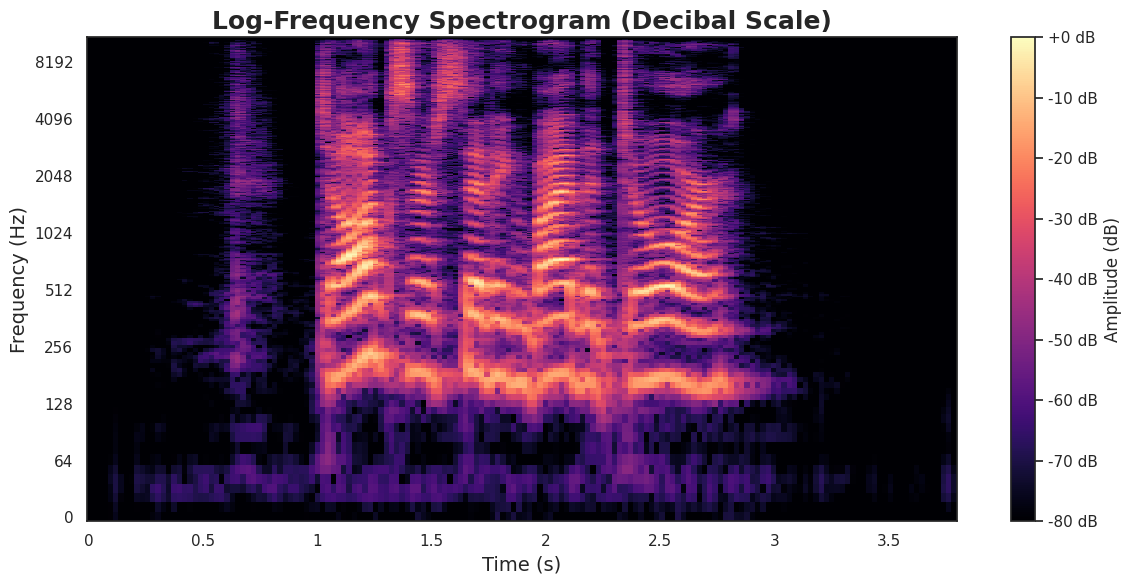

In [17]:
# Plot the log-Frequency Spectrogram
fig, ax = plt.subplots(figsize=(12, 6)) # Larger figure for better visibility

# Display the spectrogram with log-scaled frequency axis
img = librosa.display.specshow(
    S_db,            # Spectrogram data (in decibles)
    x_axis="time",   # X-axis: Time in seconds
    y_axis='log',    # Y-axis: Logarithmic frequency scale
    sr=sr,           # Sample rate (ensures correct time and frequency scaling)
    cmap='magma',    # Colormap for improved aesthetics
    ax=ax
)

# Add descriptive title and labels
ax.set_title("Log-Frequency Spectrogram (Decibal Scale)", fontsize=18, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Frequency (Hz)", fontsize=14)

# Add a color bar to indicate decibal levels
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

plt.tight_layout()
plt.show()

#### **Mel Spectrogram: A Human-Centric Representation of Audio**

A **Mel Spectrogram** is a type of spectrogram where the frequency axis is scaled according to the **Mel scale**, which aligns closely with the way humans perceive sound and pitch. It is widely used in audio processing and machine learning, particularly in tasks like **speech recognition, music analysis, and audio classification**

#### **Key Concepts**

1. **Spectrograms**:
    * A visual representation of audio in the **time-frequency domain**.
    * It shows how frequencies (y-axis) change over time (x-axis), with the intensity (color) representing the amplitude of each frequency component.

2. **Mel Scale**:
    * The Mel scale is a perceptual scale of pitches where equal distances correspond to perceieved equal changes in pitch.
    * Humans are more senstive to lower frequencies than higher ones. The Mel scale compresses higher frequencies to better reflect this sensitivity.

3. **Mel Spectrogram**:
    * A spectrogram where the frequencies are transformed into the Mel scale using **filter banks**.
    * Instead of analyzing all frequency bins linearly, the Mel spectrogram groups frequencies into broader bands at higher frequencies.

#### **How to Compute a Mel Spectrogram**
The process of gathering a Mel spectrogram typically involves:

1. **Short-Time Fourier Transforms (STFT)**:
    * Compute the STFT to convert the audio signal from the time domain to the frequency domain.

2. **Apply Mel Filter Banks**:
    * A set of overlapping triangular filters is applied to group the linear frequency bins into Mel-scaled frequency bins. 

3. **Convert Amplitude to Decibles (Optional)**:
    * Amplitudes are converted to the **logarithmic decibel scale** for better visualization and to match human loudness perception. 

In [19]:
# Generate the Mel Spectrogram
# y: Audio time series
# sr: Sampling rate of the audio
# n_mels : Number of Mel bands to generate (default is 128, here set to 256 for higher resolution)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)

# Display the shape of the Mel Spectrogram
print(f"Mel Spectrogram Shape: {S.shape}")

Mel Spectrogram Shape: (256, 164)


In [20]:
# Convert the Mel Spectrogram to Decibels ( Logarithmic Scale )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

# Display information
print(f"Mel Spectrogram (in dB) Shape: {S_db_mel.shape}")
print(f"Decimal Range: {S_db_mel.min():.2f} dB to {S_db_mel.max():.2f} dB")

Mel Spectrogram (in dB) Shape: (256, 164)
Decimal Range: -80.00 dB to 0.00 dB


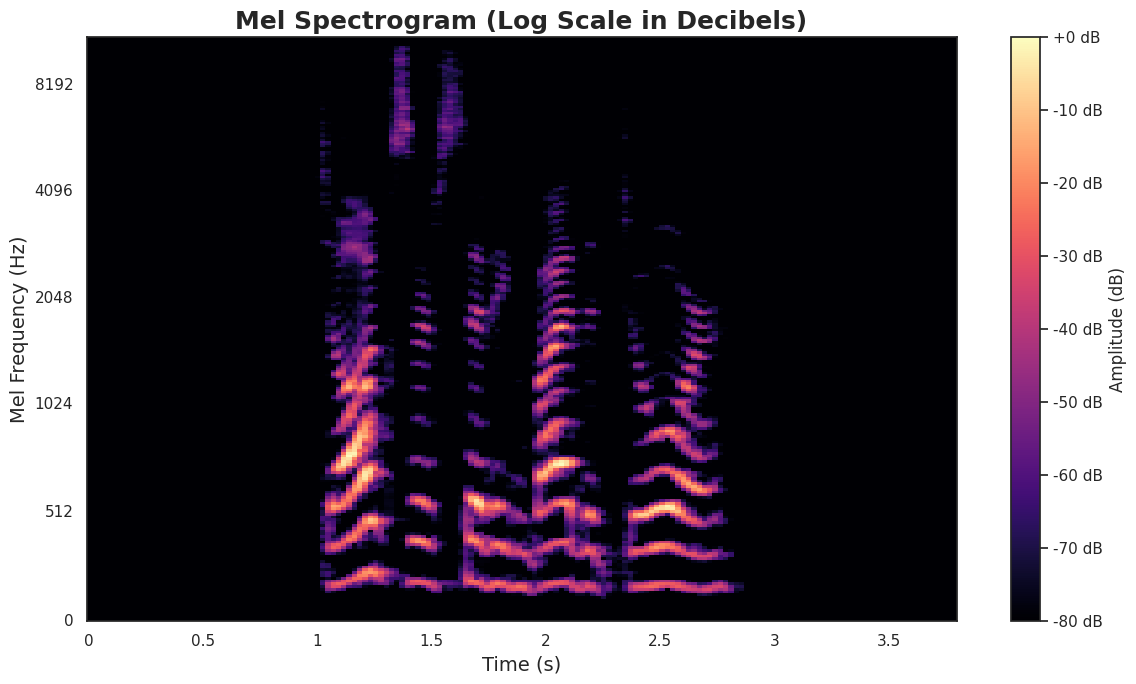

In [22]:
# Plot the Log-Scaled Mel Spectrogram
fig, ax = plt.subplots(figsize=(12, 7))

img = librosa.display.specshow(
    S_db_mel, 
    sr=sr, 
    x_axis='time',
    y_axis='mel',
    cmap='magma',
    ax=ax
)

# Add Title and Axis Labels
ax.set_title("Mel Spectrogram (Log Scale in Decibels)", fontsize=18, fontweight="bold")
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Mel Frequency (Hz)", fontsize=14)

# Add a Color Bar to Show the Decibel Range
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Adjust Layout for Better Visualization
plt.tight_layout()
plt.show()